# barc4sr: 
## Example A - Creating a magnetic field measurement

created: **28/03/2024**; last edited: **29/03/2024**

[rafael.celestre@synchrotron-soleil.fr](mailto:rafael.celestre@synchrotron-soleil.fr)

<hr style="border:1px solid orange">

In [1]:
__author__ = ['Rafael Celestre']
__contact__ = 'rafael.celestre@synchrotron-soleil.fr'
__license__ = 'GPL-3.0'
__copyright__ = 'Synchrotron SOLEIL, Saint Aubin, France'
__created__ = '22/03/2024'
__changed__ = '29/03/2024'

import sys
import  barc4sr.undulator as und
from barc4plots.barc4plots import Data4Plot
import numpy as np
# checking we are using the correct python:
print(sys.executable)
print(sys.version)

# # benchmarking tools
# %load_ext autoreload
# %autoreload 2
# %matplotlib widget

OASYS distribution of SRW
c:\Users\celestre\AppData\Local\miniconda3\envs\oasys\python.exe
3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]


### Creation of an **ideal** magnetic measurement for planar horizontal deflecting undulator at a 2.75 GeV accelerator with 28 magnetic periods of 64mm irradiating with the fundamental energy of 50 eV:

In [2]:
und_per = 64e-3

n, K = und.find_emission_harmonic_and_K(energy=50, und_per=und_per, ring_e=2.75)
B = und.get_B_from_K(K, und_per)

step_size = 200e-6
add_terminations = True
num_und_per = 28

ideal_hu64, axis = und.generate_magnetic_measurement(und_per,
                                                     B,
                                                     num_und_per,
                                                     step_size,
                                                     add_terminations,
                                                     file_path=r".\light_sources\tabulated_hu64.txt",
                                                     save_srw=True)

magFieldDict = und.get_magnetic_field_properties(ideal_hu64, axis, pad=True)

>>> saving .\light_sources\tabulated_hu64.dat
Number of peaks over 0.7*Bmax: 29
Average period: 63.998+-0.037 [mm]
Average peak: 1.086+-0.050 [T]


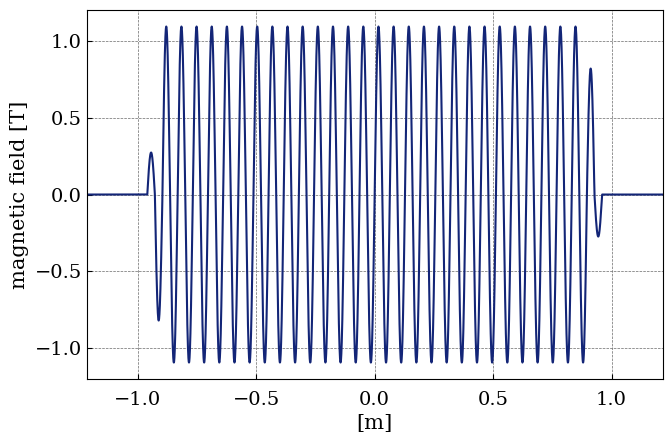

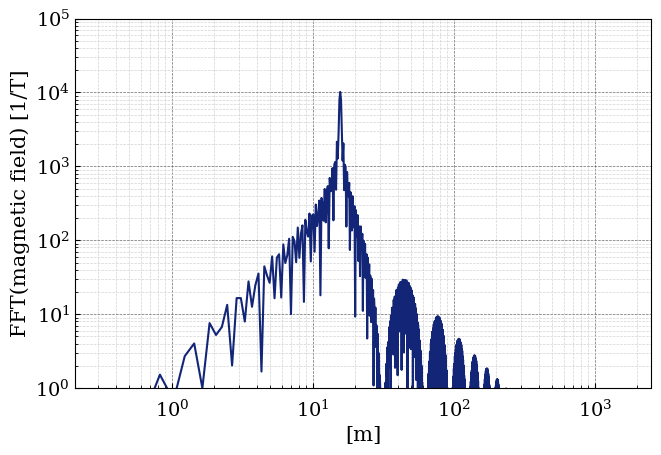

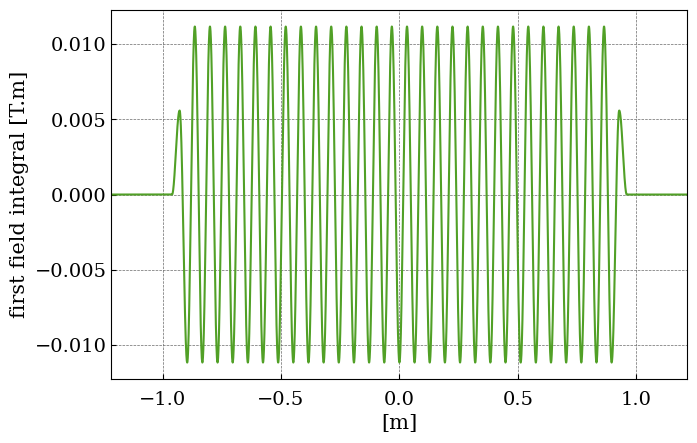

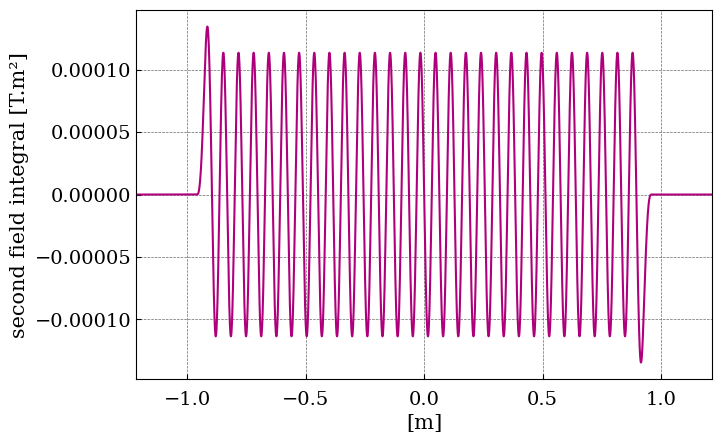

In [3]:
img = Data4Plot(magFieldDict["field"], magFieldDict["axis"])
img.additional_info(None, "[m]",  "magnetic field [T]")
img.aesthetics(400, True, True, 0 , 1, True, 4).info_1d_plot(2, None, 1, "-", False, 0, 1).plot_1d(enable=True)
img = Data4Plot(magFieldDict["fft"], magFieldDict["freq"])
img.additional_info(None, "[m]",  "FFT(magnetic field) [1/T]", None, None, 1E0, 1E5)
img.aesthetics(400, True, True, 3, 1, True, 4).info_1d_plot(2, None, 1, "-", False, 0, 1).plot_1d(enable=True)
img = Data4Plot(magFieldDict["first_field_integral"], magFieldDict["axis"])
img.additional_info(None, "[m]",  "first field integral [T.m]")
img.aesthetics(400, True, True, 0 , 1, True, 4).info_1d_plot(3, None, 1, "-", False, 0, 1).plot_1d(enable=True)
img = Data4Plot(magFieldDict["second_field_integral"], magFieldDict["axis"])
img.additional_info(None, "[m]",  "second field integral [T.m²]")
img.aesthetics(400, True, True, 0 , 1, True, 4).info_1d_plot(4, None, 1, "-", False, 0, 1).plot_1d(enable=True)